In [8]:
# importing the basic required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

C:\Users\moham\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\moham\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\moham\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [9]:
#reading the dataset
df = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')

**Exploring the dataset**

In [10]:
df.shape

(614, 13)

In [11]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [13]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


C:\Users\moham\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\moham\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


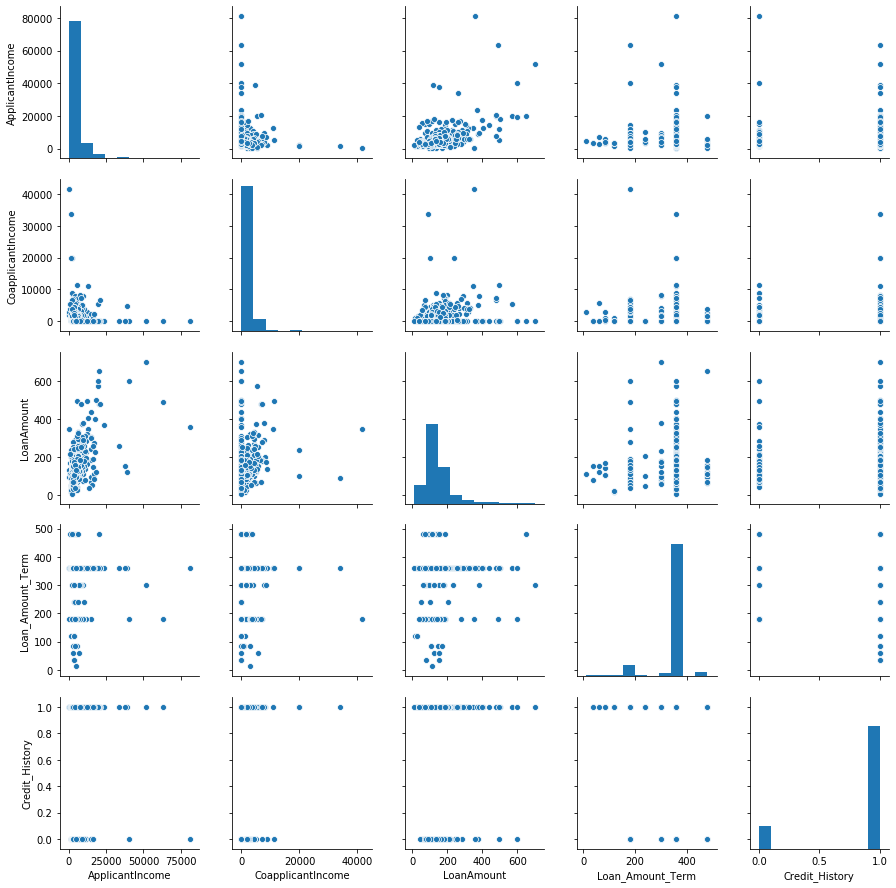

In [14]:
#using pairgrid to check for correlation between the features and distributoin for each feature.
g = sns.PairGrid(data=df)
g.map_offdiag(sns.scatterplot)
g.map_diag(plt.hist);

**Findings**

There is
- Reverse correlation between ApplicantIncome and CoapplicantIncome.
- Strong correlation between ApplicantIncome and LoanAmount
- Correlation between ApplicantIncome and LoanAmount


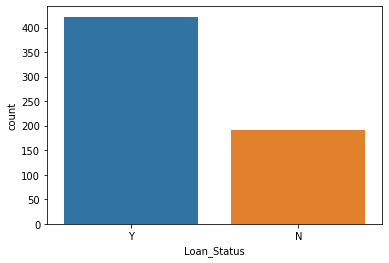

In [15]:
#Checking the loan status
sns.countplot(df.Loan_Status);

In [16]:
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

Almost 69 percent of the entries took loans

C:\Users\moham\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


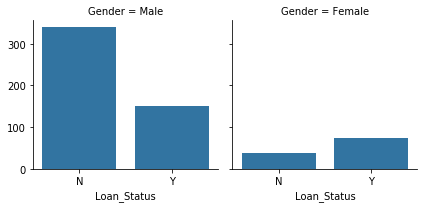

In [17]:
#Checking the correlation between the loan and each gender
g = sns.FacetGrid(data=df, col='Gender')
g.map(sns.countplot, 'Loan_Status');

In [18]:
print('Number of females is:{} \nNumber of males is: {}'.format(df[df.Gender == 'Female'].shape[0], df[df.Gender == 'Male'].shape[0]))

Number of females is:112 
Number of males is: 489


So it is obvious from the graph that females are more likely to get loans than males.
But let's not forget that in this dataset, the number of males is bigger than the number of females.

In [19]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


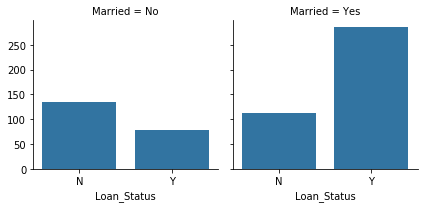

In [20]:
#Lest's also check if there is correlation between marital status and the loan status
g = sns.FacetGrid(data=df, col='Married')
g.map(sns.countplot, 'Loan_Status');

Married people are also more likely to get loans

**Data Cleaning**
-  Will make a copy of the dataset to keep the original incase it's needed
-  Check for duplicates
-  Replace or drop the missing values 

In [21]:
#will make a copy to keep the original dataset
data = df.copy()

In [22]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [23]:
#Looking for duplicates
data.duplicated().any()

False

No duplicates

In [24]:
#Dropping unnecessary features
data.drop('Loan_ID', axis=1, inplace=True)

In [25]:
#Looking for missing values
data.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
dtype: int64

In [26]:
#Let's impute the credit_history missing values with the most frquent value 
data.Credit_History = data.Credit_History.fillna(data.Credit_History.mode()[0])

In [27]:
data.Credit_History.isnull().sum()

0

In [28]:
#and impute the loan_amount missing values with the mean value
data.LoanAmount.fillna(data.LoanAmount.mean(), inplace=True)

In [29]:
data.LoanAmount.isnull().sum()

0

In [30]:
#Now let's drop the rest of missing valeus
data.dropna(inplace=True)

In [31]:
data.shape

(542, 12)

In [32]:
#Let's make sure all missing values are removed  
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**Data preprocessing** 
- Transforming non_numerical variables (Gender, Married, Education, Self_employed, Loan_status, Property_area)
- The transformation could made by different ways (replacing, mapping, LabelEncoder, pandas.get_dummies) and I'll try to use them all.

In [33]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [34]:
#Transforming Gender values using labelencoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data.Gender)

LabelEncoder()

In [35]:
data.Gender = le.transform(data.Gender)

In [36]:
data.Gender.unique()

array([1, 0], dtype=int64)

In [37]:
#Transforming Married values
data.Married.replace('Yes', 1, inplace=True)
data.Married.replace('No', 0, inplace=True)

In [38]:
data.Married.unique()

array([0, 1], dtype=int64)

In [39]:
#Transforming education values
data.Education.replace('Graduate', 1, inplace=True)
data.Education.replace('Not Graduate', 0, inplace=True)

In [40]:
data.Education.unique()

array([1, 0], dtype=int64)

In [41]:
#Self employed column values
data.Self_Employed = data.Self_Employed.map({'Yes': 1, 'No': 0})

In [42]:
data.Self_Employed.unique()

array([0, 1], dtype=int64)

In [43]:
#Loan_status column values
data.Loan_Status = data.Loan_Status.map({'Y': 1, 'N': 0})

In [44]:
data.Loan_Status.unique()

array([1, 0], dtype=int64)

In [45]:
#Property_area
data.Property_Area = data.Property_Area.map({'Rural': 0, 'Semiurban': 1, 'Urban': 2})

In [46]:
data.Property_Area.unique()

array([2, 0, 1], dtype=int64)

In [47]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


In [48]:
#Changing the credit history dtype to integer
data.Credit_History = data.Credit_History.astype(int)

In [49]:
data.dtypes

Gender                 int32
Married                int64
Dependents            object
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int32
Property_Area          int64
Loan_Status            int64
dtype: object

In [50]:
data.Dependents.unique()

array(['0', '1', '2', '3+'], dtype=object)

In [51]:
#Let's change the value +3 in the dependents column to be 3, so we can handle it as an integer
data.Dependents.replace('3+', 3, inplace=True)
data.Dependents = data.Dependents.astype(int)

In [52]:
data.Dependents.unique()

array([0, 1, 2, 3], dtype=int64)

In [53]:
data.dtypes

Gender                 int32
Married                int64
Dependents             int32
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int32
Property_Area          int64
Loan_Status            int64
dtype: object

In [54]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1,2,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1,0,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1,2,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1,2,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1,2,1


In [55]:
#Splitting the dataset into X and y
X = data.iloc[:, :11]
y = data.iloc[:, -1:]

In [56]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1,2
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1,2
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1,2
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1,2


In [57]:
y.head()

,Loan_Status
0,1
1,0
2,1
3,1
4,1


In [58]:
#Seperating training set and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [59]:
X_train.shape

(406, 11)

In [60]:
X_test.shape

(136, 11)

**Bulding our model**

There are various model can be used.
- Logistic Regression
- Decision Tree classifier
- SVC
- KNN 

To evaluate a model's performance, some scores have to be measured:

- Accuracy: for a general look of the model's performance
- Precision: to detect the possibilty of having type 1 error
- recall: to detect the possibilty of having type 2 error
- F1_score: Overall evaluation

In [65]:
#Building an evaluation function
#importing necessary measures
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
#Building the function
def model_eval(model, true, pred):
    print('{} model \nAccuracy: {} \nPrecision: {} \nRecall: {} \nF1_score: {}'
          .format(model, accuracy_score(true, pred), precision_score(true, pred),
                 recall_score(true, pred), f1_score(true, pred)))
    

In [62]:
#Building our models
#logistic regression
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(X_train, y_train)

C:\Users\moham\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\moham\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
#making predictions 
logit_pred = logit.predict(X_test)

In [66]:
#evaluate the model
model_eval('LogisticRegression', y_test, logit_pred)

LogisticRegression model 
Accuracy: 0.8014705882352942 
Precision: 0.782258064516129 
Recall: 1.0 
F1_score: 0.8778280542986425


In [67]:
#using the confusion matrix for more details
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, logit_pred)
cm

array([[12, 27],
       [ 0, 97]], dtype=int64)

From the model evaluation results we can see:

- Our model tends to be high recall(will avoid type 2 error as much as possible)
- f1_score(harmonic mean of precision and recall) is 87.78%

In [68]:
#decission tree classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [69]:
#making predictions
dt_pred = dt.predict(X_test)

In [70]:
#evaluating the model
model_eval('DecisionTreeClassifier', y_test, dt_pred)

DecisionTreeClassifier model 
Accuracy: 0.6911764705882353 
Precision: 0.7835051546391752 
Recall: 0.7835051546391752 
F1_score: 0.7835051546391752


In [71]:
cm_dt = confusion_matrix(y_test, dt_pred)
cm_dt

array([[18, 21],
       [21, 76]], dtype=int64)

In [72]:
#Support vector classifier
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

C:\Users\moham\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\moham\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [73]:
#making predictions
svc_pred = svc.predict(X_test)

In [74]:
#model evaluation
model_eval('SVC', y_test, svc_pred)

SVC model 
Accuracy: 0.7132352941176471 
Precision: 0.7132352941176471 
Recall: 1.0 
F1_score: 0.8326180257510729


Support vector classifier is also doing good when it comes to recall and type 2 error but
this time with less precision and f1_score than the LogisticRegression model.

In [75]:
#knn classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

C:\Users\moham\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [76]:
#making predictions
knn_pred = knn.predict(X_test)

In [77]:
#model evaluation
model_eval('KNeighborsClassifier', y_test, knn_pred)

KNeighborsClassifier model 
Accuracy: 0.5882352941176471 
Precision: 0.6880733944954128 
Recall: 0.7731958762886598 
F1_score: 0.7281553398058253
